In [80]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

Load and pre-process the dataset

In [10]:
df_heart = pd.read_csv("./Dataset/HeartDataset.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df_normalized = df_heart.copy()

In [16]:
# Normalizing the Dataset using sklearn

from sklearn.preprocessing import MinMaxScaler
columnsToNormalize = ['age', 'trestbps', 'chol', 'thalach']
for column in columnsToNormalize:
    df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))
df_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,2.3,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,3.5,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,1.4,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.8,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.6,2,0,2,1


In [69]:
# Extract the target column as our true label vector
train_Y = np.array(df_heart['target'])
# df_normalized.drop(['target'], axis=1, inplace=True)
train_Y = train_Y.astype('float32')
train_Y = train_Y.reshape(299,1)
print(train_Y)
print(train_Y.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [66]:
train_X = np.array(df_normalized.values)
train_X = train_X.astype('float32')
print(train_X.shape)

(299, 13)


Now out Dataset and X,Y train variables are ready

In [84]:
# Create the initialization for our parameters W,b

def initialize_parameters():
    # My model will have tree layers of 13 (Features layer), 5 Units, 3 Units and the Output Layer with 1 Unit
    # I will use Tensorflow Keras initializers to do this
    
    # And... I'll use the He initialization because i have Relu activations in my model
    initializerHe = tf.keras.initializers.HeNormal()
    
    # And a Glotot Normal to the output layer (Sigmoid)
    initializerGn = tf.keras.initializers.GlorotNormal()
    
    W1 = tf.Variable(initializerHe(shape=(5, 13)))
    b1 = tf.Variable(initializerHe(shape=(5, 1)))
    W2 = tf.Variable(initializerHe(shape=(3, 5)))
    b2 = tf.Variable(initializerHe(shape=(3, 1)))
    W3 = tf.Variable(initializerGn(shape=(1, 3)))
    b3 = tf.Variable(initializerGn(shape=(1, 1)))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [40]:
parameters = initialize_parameters()

Now, create the Fordward Propagation step

In [59]:
def forward_propagation(X, parameters):
    # Retrieve the parameters
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Activations...
    
    Z1 = tf.math.add(tf.linalg.matmul(W1,X), b1)
    A1 = tf.keras.activations.relu(Z1)
    Z2 = tf.math.add(tf.linalg.matmul(W2,A1), b2)
    A2 = tf.keras.activations.relu(Z2)
    Z3 = tf.math.add(tf.linalg.matmul(W3,A2), b3)
    A3 = tf.keras.activations.sigmoid(Z3)
    
    return Z3

In [67]:
# Fordward Propagation test
print(forward_propagation(train_X.transpose(), parameters))

tf.Tensor(
[[ 2.8020773   2.425813    2.4129038   2.3041353   5.3234973   4.206979
   2.8335092   2.7965977   2.7910306   2.2405286   2.078617    2.799202
   2.1029239   4.497656    2.8106759   2.8082342   2.799555    2.781363
   0.70624137  2.4388452   2.815924    3.6328304   1.1668595   2.8724022
   2.8019772   1.319076    1.5031724   2.7868295   2.244443    2.808623
   1.981213    2.0015996   2.0861108   2.7973244   3.6472511   2.8309538
   2.8006988   2.7864017   2.802499    2.8244362   2.4891822   2.8163092
   1.0513648   2.8391142   2.7994015   2.531636    2.800053    2.7991192
   4.9805064   2.1648984   2.8171282   3.3843002   0.6088457   2.8018563
   2.81411     0.81560636  1.0239623   1.009147    2.7852712   1.1748395
   2.5940015   2.7986374   2.7838345   2.7663255   2.590956    1.4273067
   4.749012    2.8321936   2.4618056   2.6636648   2.799543    2.8052118
   1.7182647   1.8149478   2.796392    2.8333154   1.7755171   6.3951235
   1.5050068   2.824621    2.7845955   2.262

Let's create the Cost function

In [101]:
def compute_cost(predicted_Y, true_Y):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return bce(true_Y, predicted_Y)

In [89]:
# Compute cost testing
pred = tf.constant([[ 2.4048107,   5.0334096 ],
             [-0.7921977,  -4.1523376 ],
             [ 0.9447198,  -0.46802214],
             [ 1.158121,    3.9810789 ],
             [ 4.768706,    2.3220146 ],
             [ 6.1481323,   3.909829  ]])
true = tf.constant([[ 1,   0 ],
             [1,  1 ],
             [ 0,  0],
             [ 0,    0 ],
             [ 1,    1 ],
             [ 1,   0  ]])
compute_cost(pred, true)

<tf.Tensor: shape=(), dtype=float32, numpy=7.923182>

Now, let's create the model

In [76]:
def model(X_train, Y_train, learning_rate = 0.0001, num_epochs = 1500, print_cost = True):
    
    # Save all the costs around the training
    costs = []
    
    # Initialize the parameters
    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # I want to use the Adam optimizer in my model, in my experience, it's very efficient
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            # Do the fordward propagation
            Z3 = forward_propagation(tf.transpose(X_train), parameters)

            # Compute the cost function
            cost = compute_cost(Z3, tf.transpose(Y_train))

        trainable_variables = [W1, b1, W2, b2, W3, b3]
        grads = tape.gradient(cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))

        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, cost))

        costs.append(cost)
    
    return parameters, costs

Cost after epoch 0: 0.676989
Cost after epoch 10: 0.654139
Cost after epoch 20: 0.634664
Cost after epoch 30: 0.618241
Cost after epoch 40: 0.604630
Cost after epoch 50: 0.592816
Cost after epoch 60: 0.581838
Cost after epoch 70: 0.572191
Cost after epoch 80: 0.563883
Cost after epoch 90: 0.556366
Cost after epoch 100: 0.549535
Cost after epoch 110: 0.543200
Cost after epoch 120: 0.537139
Cost after epoch 130: 0.531416
Cost after epoch 140: 0.526046
Cost after epoch 150: 0.520884
Cost after epoch 160: 0.515969
Cost after epoch 170: 0.511405
Cost after epoch 180: 0.507231
Cost after epoch 190: 0.503513
Cost after epoch 200: 0.499891
Cost after epoch 210: 0.496449
Cost after epoch 220: 0.493146
Cost after epoch 230: 0.490008
Cost after epoch 240: 0.486981
Cost after epoch 250: 0.484050
Cost after epoch 260: 0.481295
Cost after epoch 270: 0.478645
Cost after epoch 280: 0.476115
Cost after epoch 290: 0.473679
Cost after epoch 300: 0.471204
Cost after epoch 310: 0.468589
Cost after epoch 32

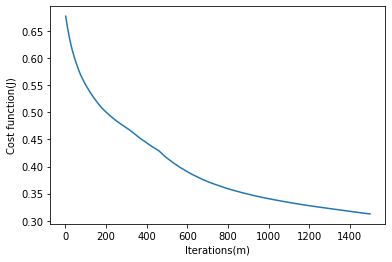

In [102]:
num_epochsTrain = 1500
parameters, costs = model(train_X, train_Y, learning_rate = 0.0005,num_epochs = num_epochsTrain)
plt.plot(np.arange(num_epochsTrain)+1, costs)
plt.xlabel("Iterations(m)")
plt.ylabel("Cost function(J)")
plt.show()